In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("input"))
# df.head()
# Any results you write to the current directory are saved as output.

['shot_logs.csv']


In [2]:
df = pd.read_csv('input/shot_logs.csv')
df['SHOT_DIST_ROUND'] = df['SHOT_DIST'].round()
df['SHOT_CLOCK_ROUND'] = df['SHOT_CLOCK'].round()
df['CLOSE_DEF_DIST_ROUND'] = df['CLOSE_DEF_DIST'].round()
df['BALL_HOG'] = None
df['SHOT_NUMBER_CAT']=None
df.loc[df['TOUCH_TIME']<=1,'BALL_HOG']='<=1'
df.loc[df['TOUCH_TIME']>15,'BALL_HOG']='>15'
df.loc[(df['TOUCH_TIME']<=15)&(df['TOUCH_TIME']>1),'BALL_HOG']='between 1 and 15'
df.loc[df['SHOT_NUMBER']==1,'SHOT_NUMBER_CAT']='=1'
df.loc[df['SHOT_NUMBER']>1,'SHOT_NUMBER_CAT']='>1'
df['FirstShotQ'] = (df['SHOT_NUMBER']==1).astype(int) * df['PERIOD']

df['SHOT_RESULT_BINARY'] = (df['SHOT_RESULT']=='made').astype(int)
per_player = df[(df['SHOT_CLOCK']>1)&(df['SHOT_DIST_ROUND']<40)&(df['CLOSE_DEF_DIST']<1.5)].groupby(['SHOT_DIST_ROUND','CLOSEST_DEFENDER']).mean()[['SHOT_RESULT_BINARY']].reset_index()
mean = per_player.pivot_table(index='CLOSEST_DEFENDER', columns='SHOT_DIST_ROUND' , values='SHOT_RESULT_BINARY').mean(axis=1)
per_player_count = df[(df['SHOT_CLOCK']>1)&(df['SHOT_DIST_ROUND']<40)&(df['CLOSE_DEF_DIST']<1.5)].groupby(['SHOT_DIST_ROUND','CLOSEST_DEFENDER']).count()[['SHOT_RESULT_BINARY']].reset_index()
sum = per_player_count.pivot_table(index='CLOSEST_DEFENDER', columns='SHOT_DIST_ROUND' , values='SHOT_RESULT_BINARY').sum(axis=1)
list_of_over_15 =  list(sum[sum>50].index)
mean[mean.index.isin(list_of_over_15)].sort_values().head()
# print ('off ball and dribble')
# print (df[df['PTS_TYPE']==2].corr()[['TOUCH_TIME','DRIBBLES']].loc['SHOT_RESULT_BINARY'])
# print (df[(df['PTS_TYPE']==3)&(df['SHOT_DIST_ROUND']<30)].corr()[['TOUCH_TIME','DRIBBLES']].loc['SHOT_RESULT_BINARY'])



CLOSEST_DEFENDER
Bogut, Andrew      0.228590
Noah, Joakim       0.230596
Korver, Kyle       0.245573
Baynes, Aron       0.263561
Wright, Brandan    0.266768
dtype: float64

In [3]:
import matplotlib.pyplot as plt
df[df['SHOT_DIST_ROUND']<35].groupby('SHOT_DIST_ROUND').mean()['SHOT_RESULT_BINARY'].plot()
plt.xlabel('Shot Distance')
plt.ylabel('Success Rate')
plt.suptitle('Shot Succeess Rate By Distance')
plt.show()





<Figure size 640x480 with 1 Axes>

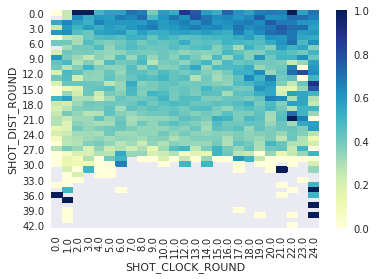

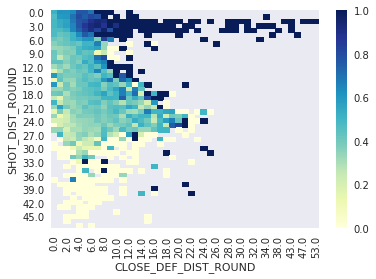

CLOSE_DEF_DIST_ROUND      0.0       1.0       2.0       3.0       4.0   \
SHOT_DIST_ROUND                                                          
0.0                   0.514286  0.609375  0.607843  0.638554  0.770833   
1.0                   0.471831  0.593651  0.597951  0.703057  0.804428   
2.0                   0.490463  0.538462  0.562500  0.680098  0.774530   
3.0                   0.489209  0.533541  0.571429  0.652120  0.773504   
4.0                   0.475884  0.473752  0.513881  0.645414  0.739372   
5.0                   0.473934  0.425620  0.444444  0.505360  0.636111   
6.0                   0.410811  0.386412  0.427160  0.507891  0.553623   
7.0                   0.361111  0.403704  0.424829  0.451346  0.419708   
8.0                   0.324675  0.333333  0.356079  0.384466  0.477273   
9.0                   0.411765  0.342105  0.376448  0.365796  0.477273   
10.0                  0.406250  0.255556  0.349057  0.412987  0.405970   
11.0                  0.437500  0.437500  0.366935  0.420863  0.374126   
12.0                  0.312500  0.372549  0.318386  0.408784  0.454839   
13.0                  0.166667  0.304348  0.401198  0.373134  0.417969   
14.0                  0.600000  0.411765  0.375000  0.381974  0.392330   
15.0                  0.125000  0.434783  0.342282  0.339535  0.411960   
16.0                  0.600000  0.241379  0.398773  0.315789  0.415385   
17.0                  0.333333  0.333333  0.393443  0.361940  0.381995   
18.0                  0.400000  0.421053  0.298137  0.383513  0.414384   
19.0                  0.250000  0.150000  0.339450  0.368000  0.395397   
20.0                  0.500000  0.250000  0.333333  0.320896  0.379252   
21.0                  0.333333  0.571429  0.386792  0.327485  0.359606   
22.0                  0.153846  0.380952  0.250000  0.362385  0.341328   
23.0                  0.333333  0.125000  0.222222  0.312500  0.378698   
24.0                  0.200000  0.206897  0.232558  0.307882  0.328586   
25.0                  0.000000  0.210526  0.262136  0.267267  0.316842   
26.0                  0.333333  0.333333  0.200000  0.304094  0.299539   
27.0                       NaN  0.500000  0.250000  0.262295  0.348148   
28.0                       NaN  0.000000  0.263158  0.235294  0.337662   
29.0                  0.000000       NaN  0.333333  0.400000  0.115385   
30.0                  0.000000  0.000000  0.000000  0.111111  0.235294   
31.0                       NaN  0.000000  0.000000  0.000000  0.285714   
32.0                       NaN  0.000000  0.000000  0.400000  0.333333   
33.0                       NaN       NaN       NaN  0.000000  0.125000   
34.0                       NaN       NaN  0.000000       NaN  0.000000   
35.0                       NaN       NaN       NaN       NaN  0.000000   
36.0                       NaN       NaN  0.000000  0.000000  0.000000   
37.0                  0.000000       NaN       NaN  0.666667  0.000000   
38.0                       NaN  0.000000  0.000000  0.000000  0.000000   
39.0                       NaN       NaN  0.000000  0.000000  0.000000   
40.0                       NaN       NaN  0.000000       NaN  0.000000   
41.0                       NaN       NaN       NaN  0.000000       NaN   
42.0                       NaN       NaN  0.000000  0.000000  0.000000   
43.0                       NaN  0.000000  0.000000       NaN  0.000000   
44.0                       NaN       NaN       NaN       NaN  0.000000   
45.0                       NaN       NaN  0.000000  0.000000  0.000000   
46.0                       NaN       NaN  0.000000       NaN       NaN   
47.0                       NaN       NaN       NaN       NaN  0.000000   

CLOSE_DEF_DIST_ROUND      5.0       6.0       7.0       8.0       9.0   ...   \
SHOT_DIST_ROUND                                                         ...    
0.0                   0.772727  0.700000  1.000000  1.000000  1.000000  ...    
1.0                   0.752688  0.812500  0.789474  1.00000

In [4]:
tmp = df[df['LOCATION']=='A']
hm = tmp.groupby(['SHOT_DIST_ROUND','SHOT_CLOCK_ROUND']).mean().reset_index().pivot_table(index='SHOT_DIST_ROUND', columns='SHOT_CLOCK_ROUND',values='SHOT_RESULT_BINARY')
import seaborn as sns; sns.set()
sns.heatmap(hm, vmin=0, vmax=1,cmap="YlGnBu")
plt.show()
# print (df.columns)
hm = tmp.groupby(['SHOT_DIST_ROUND','CLOSE_DEF_DIST_ROUND']).mean().reset_index().pivot_table(index='SHOT_DIST_ROUND', columns='CLOSE_DEF_DIST_ROUND',values='SHOT_RESULT_BINARY')
import seaborn as sns; sns.set()
sns.heatmap(hm, vmin=0, vmax=1,cmap="YlGnBu")

plt.show()

hm

Text(0.5,0.98,'First Shot by players')

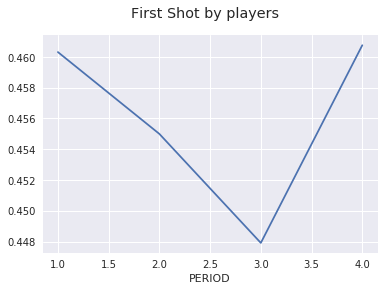

In [5]:
import matplotlib.pyplot as plt
drib = df.groupby('DRIBBLES').mean()[['PTS','SHOT_CLOCK_ROUND','FGM']]
drib = df.groupby('DRIBBLES').mean()['FGM']
drib=drib[drib.index<20]
# drib.plot()
# plt.ylabel('FG%')
# plt.show()

drib = df.groupby(['DRIBBLES','SHOT_CLOCK_ROUND']).mean()[['PTS','FGM']].reset_index()
drib.pivot_table(index='DRIBBLES',columns='SHOT_CLOCK_ROUND',values='FGM')



df.columns
shot_and_period = df.groupby(['SHOT_NUMBER','PERIOD']).mean()[['SHOT_RESULT_BINARY']].reset_index()
shot_and_period=shot_and_period[shot_and_period['PERIOD']<5]
# shot_and_period=shot_and_period[shot_and_period['SHOT_NUMBER']<5]
shot_and_period.pivot_table(index='SHOT_NUMBER',columns='PERIOD',values='SHOT_RESULT_BINARY').iloc[1].plot()
plt.suptitle('First Shot by players')

In [6]:
x = df[['SHOT_CLOCK_ROUND',
        'CLOSE_DEF_DIST_ROUND',
        'BALL_HOG',
        'DRIBBLES',
        'SHOT_DIST_ROUND',
        'SHOT_NUMBER',
        'PTS_TYPE',
        'player_name',
        'CLOSEST_DEFENDER',
        'SHOT_NUMBER_CAT',
        'FirstShotQ'
        ]].fillna(0)
dummy_features_BALL_HOG = pd.get_dummies(x['BALL_HOG'])
x = pd.concat([x, pd.get_dummies(x['BALL_HOG'], prefix='hog_')], axis=1)
del x['BALL_HOG']
x = pd.concat([x, pd.get_dummies(x['player_name'], prefix='player_')], axis=1)
del x['player_name']
x = pd.concat([x, pd.get_dummies(x['CLOSEST_DEFENDER'], prefix='def_')], axis=1)
del x['CLOSEST_DEFENDER']
x = pd.concat([x, pd.get_dummies(x['SHOT_NUMBER_CAT'],prefix = 'shot_cat_')], axis=1)
del x['SHOT_NUMBER_CAT']

y = df['SHOT_RESULT_BINARY']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size=0.2)

x.head()


SHOT_CLOCK_ROUND  CLOSE_DEF_DIST_ROUND  DRIBBLES  SHOT_DIST_ROUND  \
0              11.0                   1.0         2              8.0   
1               3.0                   6.0         0             28.0   
2               0.0                   1.0         3             10.0   
3              10.0                   3.0         2             17.0   
4              11.0                   1.0         2              4.0   

   SHOT_NUMBER  PTS_TYPE  FirstShotQ  hog__<=1  hog__>15  \
0            1         2           1         0         0   
1            2         3           0         1         0   
2            3         2           0         0         0   
3            4         2           0         0         0   
4            5         2           0         0         0   

   hog__between 1 and 15      ...       def__Wright, Brandan  \
0                      1      ...                          0   
1                      0      ...                          0   
2                      1      ...                          0   
3                      1      ...                          0   
4                      1      ...                          0   

   def__Wright, Dorell  def__Wroten, Tony  def__Young, James  \
0                    0                  0                  0   
1                    0                  0                  0   
2                    0                  0                  0   
3                    0                  0                  0   
4                    0                  0                  0   

   def__Young, Nick  def__Young, Thaddeus  def__Zeller, Cody  \
0                 0                     0                  0   
1                 0                     0                  0   
2                 0                     0                  0   
3                 0                     0                  0   
4                 0                     1                  0   

   def__Zeller, Tyler  shot_cat__=1  shot_cat__>1  
0                   0             1             0  
1                   0             0             1  
2                   0             0             1  
3                   0             0             1  
4                   0             0             1  

[5 rows x 766 columns]

/home/nachi/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


got results


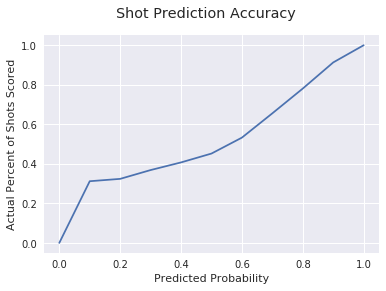

[[10545  3455]
 [ 6851  4763]]
             precision    recall  f1-score   support

          0       0.61      0.75      0.67     14000
          1       0.58      0.41      0.48     11614

avg / total       0.59      0.60      0.58     25614

0.5976419145779652


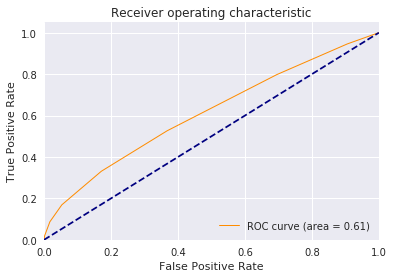

In [9]:
from sklearn.preprocessing import StandardScaler

# sc = StandardScaler()  
# X_train = sc.fit_transform(X_train)  
# X_test = sc.transform(X_test) 

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
regressor = RandomForestClassifier(n_estimators=100, random_state=30,max_features=8 )  
# regressor = LogisticRegression(fit_intercept=True,tol=0.00000000001, C = 0.001)
regressor.fit(X_train, y_train)  
y_pred = regressor.predict_proba(X_test) 
print('got results')
from sklearn import metrics
res = pd.DataFrame(y_pred, columns=['not_pred','pred'])
res['pred']= np.round(res['pred'],1)
res['cnt']=y_test.values
res
res.groupby('pred').mean()['cnt'].plot()
plt.xlabel('Predicted Probability')
plt.ylabel('Actual Percent of Shots Scored')
plt.suptitle('Shot Prediction Accuracy')
plt.show()

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_curve ,auc
abs_pred = regressor.predict(X_test) 
print(confusion_matrix(y_test,abs_pred))  
print(classification_report(y_test,abs_pred))  
print(accuracy_score(y_test, abs_pred))  

fpr, tpr, thresholds = roc_curve(y_test, res['pred'].values)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
res = pd.DataFrame(y_pred,columns=['res_0','res'])
res=np.round(res,1)
res['cnt']=y_test.values
res.groupby('res').mean()['cnt'].plot()
plt.suptitle('Prediction Result vs Actaul Shot Avg Per Bucket')
plt.xlabel('Predicted Result')
plt.ylabel('Shot % Per Bucket')
plt.show()

res.groupby('res').count()
# res.groupby('cnt').mean()
# res

In [28]:
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_score
seed = 7
models = []
models.append(('LR', LogisticRegression(fit_intercept=True,tol=0.000001)))
# models.append(('LDA', LinearDiscriminantAnalysis()))
# models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', RandomForestClassifier()))
# models.append(('NB', GaussianNB()))
# models.append(('SVM', SVC()))
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    print(name)
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

LR


KeyboardInterrupt: 

In [33]:
# res.groupby('pred').mean()['cnt'].plot()
res['round'] = np.ceil(res['pred']*10) // 3 * 3 
(res.groupby('round').mean()['cnt']/res.groupby('round').std()['cnt'])*np.sqrt(res.groupby('round').count()['cnt'])

# res.groupby('round').count()['cnt']

round
0.0     30.463502
3.0    110.010006
6.0     95.746649
9.0     50.378567
Name: cnt, dtype: float64